                                                           P3: Investigate a Dataset
                                                           Analysis of Titanic Data                                                              
                                                           Gregor Bricelj



# ANALYSIS OF TITANIC DATA 

Version 1.1, 2017 August 31
 
The goal of this Jupyter notebook presentation is to demonstrate all phases of data analysis process on a curated dataset Titanic Data, retrieved from https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv. 

Description of the dataset can be found at https://www.kaggle.com/c/titanic/data. 

This notebook was created using Python 3 and Jupyter Notebook 5.

## Table of Contents
* <a href='#Introduction'>Introduction</a>
* <a href='#Tools'>Tools</a>
* <a href='#Data-Extraction-and-First-Look-at-the-Data'>Data Extraction and First Look at the Data</a>
* <a href='#Basic-Observations-About-Dataset'>Basic Observations About Dataset</a>
* <a href='#Data-Cleaning'>Data Cleaning</a>
* <a href='#Data-Exploration'>Data Exploration</a>
* <a href='#Another-Look-at-Fare'>Another Look at Fare</a>
* <a href='#Conclusion'>Conclusion</a>
* <a href='#Sources'>Sources</a>

### Introduction

Titanic Data file contains passenger information from 891 of the 2224 passengers and crew on board of the Titanic. The aforementioned sample of 891 passengers will be treated as population (N) for the purpose of this presentation. 

The main question I am going to address in this presentation is "How did passengers' age, gender, socio-economic status, presence of other family members, fare and port of embarkation influence their chances of survival?" With this question answered, I am going to be able to present a "model" Titanic passenger with best (or worst) chances of survival.

### Tools

I will be using Python's commonly used data analysis and visualization tools and libraries - Jupyter Notebook, NumPy, Pandas, Matplotlib, Seaborn, and to a smaller degree, Astropy.

In [1]:
# data analysis-specific imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('ggplot')
#import astropy.visualization as av
# Improves some settings over the matplotlib default style
#from astropy.visualization import astropy_mpl_style 
# Enhanced histogram function
#plt.style.use(astropy_mpl_style)

# correction of visuals:
#%config InlineBackend.figure_format = 'retina'

# plot defaults
default_labelsize = 16
plt.rcParams['xtick.labelsize'] = default_labelsize
plt.rcParams['ytick.labelsize'] = default_labelsize
plt.rcParams['figure.figsize'] = (30, 9)

# disable warnings
import warnings
warnings.filterwarnings('ignore')

## Data Extraction and First Look at the Data

The data has been retreived and is ready for processing. Its source file *titanic-data.csv* can be easily transformed into a Pandas DataFrame using Pandas' IO tool *read_csv*:

In [2]:
# extracting data, creating initial Pandas DataFrame
df = pd.read_csv('titanic-data.csv')
# setting index - PassengerId seems like an organic index to use 
df.set_index('PassengerId', inplace=True)
# check if index values are unique
df.index.is_unique

True

### Basic Observations About Dataset

The dataset now consists of twelve columns, including index. Here are its first six rows, there are some missing data visible (*NaN*):

In [3]:
df.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Pandas' useful function *describe()* offers a quick peek into DataFrame's statistics:

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 passengers in the population, the majority of whom belonged to the lower socio-economic class. Data about passengers' age is incomplete - there are only 714 records in the dataset, the remaining 177 records (19.9 %) are missing, with the most senior person being 80 years old, and the youngest 5 months old at the time of  travel. Of the passengers who were travelling with their families, the persons with most family members on board were travelling with the maximum of 8 siblings/spouses and/or 6 parents/children. The most expensive fare cost 512.33 pounds, whereas the cheapest ride was free. 

Additionally, there is other easily readable data in the dataset: 

In [5]:
# there are no missing records in the following columns (uncomment to see):

#print(df['Survived'].value_counts())               
#print('----')
#print(df['Pclass'].value_counts())            
#print('----')
#print(df['Name'].notnull().value_counts())     
#print('----')
#print(df['Sex'].value_counts())                
#print('----')
#print(df['Parch'].value_counts())              
#print('----')
#print(df['Ticket'].notnull().value_counts())   
#print('----')
#print(df['Fare'].notnull().value_counts())      

Data about survival, passenger class, name, sex, presence of parents/children, ticket, and fare is complete. 

Out of 891 passengers aboard Titanic at the time of its sinking, 342 survived (38.4 %). 

Passengers' apparent socio-economic class composition was as follows:

Soc.-Econ. Class | Count | Percent (%)
:---: | :---: | :---:
**Pclass 1** | 216 | 24.2
**Pclass 2** | 184 | 20.7
**Pclass 3** | 491 | 55.1
**Total** | **891** | **100.0**

Passengers were predominantly (577 out of 891 or 64.8 %) male, and 314 (or 35.2 %) were female.

Majority of passengers (678, or 76.1 %) traveled without any parents or children.

Unfortunately, some of the initial data is problematic, with individual records being either incomplete or possibly inaccurate, and I need to decide what to do with it. Such data should be taken care of during the data cleaning process.

## Data Cleaning

Titanic dataset is missing some datapoints:

In [6]:
df.isnull().sum() # check for NaNs

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The column *Embarked* contains one-letter port of embarkation designations. Two of the 891 port designations (about 0.2 %) are *NaN*s. There are a few options possible here, but because the missing data are so few, the best course of action seems to be to either delete the two rows containing *NaN*s (*listwise deletion*), or fill the two data fields with the most plausible values (*single imputation*). I choose to do the latter, since its impact on the population statistics will be negligible, and I get to keep the slightly bigger population size. 

In [7]:
# find the 2 NaN passenger keys and view records  --> indices of NaNs
df['Embarked'].sort_values(na_position='first')[:(df['Embarked'] \
                                               .isnull().sum())] 
df.loc[62], df.loc[830]  # same pclass, ticket, fare, cabin

(Survived                      1
 Pclass                        1
 Name        Icard, Miss. Amelie
 Sex                      female
 Age                          38
 SibSp                         0
 Parch                         0
 Ticket                   113572
 Fare                         80
 Cabin                       B28
 Embarked                    NaN
 Name: 62, dtype: object, Survived                                            1
 Pclass                                              1
 Name        Stone, Mrs. George Nelson (Martha Evelyn)
 Sex                                            female
 Age                                                62
 SibSp                                               0
 Parch                                               0
 Ticket                                         113572
 Fare                                               80
 Cabin                                             B28
 Embarked                                          NaN
 Name: 

In [8]:
# create a dataframe with 'Sex' == 'female' 
df_female_only = df[df.Sex == 'female']

My goal is to infer port of embarkation (*Embarked* value) for the two passengers above from *Pclass*, *Sex* and *Fare* columns. 

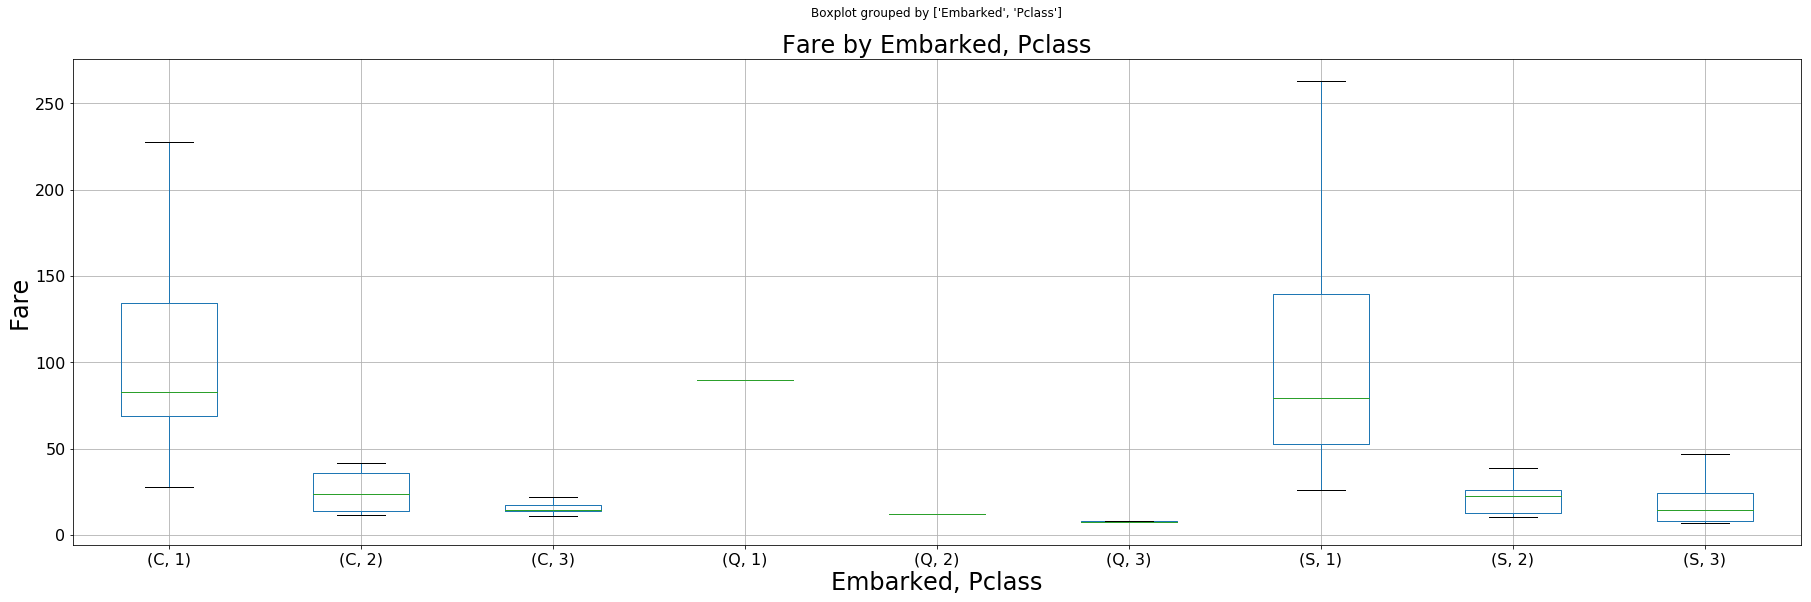

In [9]:
df_female_only.boxplot(column='Fare', by=['Embarked', 'Pclass'],
                       showfliers=False)
plt.title('Fare by Embarked, Pclass', fontsize=24)
plt.xlabel('Embarked, Pclass', fontsize=24)
plt.ylabel('Fare', fontsize=24)
plt.show()

The most likely point of embarkation for the 2 missing datapoints is Southampton, both in terms of its median fare value (closest to 80), and because its sample size is biggest.

In [10]:
print(len(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'S']))
print(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'S'].median()) 
print('----')
# Queenstown, Cherbourg: smaller samples, Fare further away from 80 
print(len(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'Q']))
print(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'Q'].median())
print('----')
print(len(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'C']))
print(df[df.Sex == 'female'][df.Pclass == 1][df.Embarked == 'C'].median())

48
Survived     1.00
Pclass       1.00
Age         33.00
SibSp        0.50
Parch        0.00
Fare        79.65
dtype: float64
----
1
Survived        1.0
Pclass          1.0
Age            33.0
SibSp           1.0
Parch           0.0
Ticket      19928.0
Fare           90.0
dtype: float64
----
43
Survived     1.0000
Pclass       1.0000
Age         37.0000
SibSp        0.0000
Parch        0.0000
Fare        83.1583
dtype: float64


In [11]:
# imputing the most likely value
df.set_value(62, 'Embarked', 'S')
df.set_value(830, 'Embarked', 'S')
df.Embarked.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

The column *Ticket* seems to contain unordered ticket designations and numbers. I don't believe that this data can be used in a meaningful way, so I am dropping it from the DataFrame. 

The column *Cabin* contains cabin numbers (deck-number combos). The problem is that about 77% of all cabin numbers are not known - 687 out of 891 values are *NaN*s. Consequentially, the column *Cabin* has to be dropped as well.  

In [12]:
# dropping columns 'Ticket' and 'Cabin' from DataFrame
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

As already mentioned above, about 20 % of records in column *Age* are missing. This is a rather large gap in the data. I can try and infer some substitute values so that I could then impute them in places where original values are missing. To do so, I may utilize clues that other datapoints suggest. 
My initial idea is to infer the missing *Age* datapoints from data in *Pclass*, *Sex*, *Embarked*, and *Survived* columns.

In [13]:
# create two new dataframes to make manipulation of records with/without age values easier

df['Age'].isnull().sum()  #  --> 177 
age_NaN_idindex_array = ((df['Age'].sort_values(na_position='first'))\
                         [:177]).index.values
age_NaN_idindex_list = list(age_NaN_idindex_array) # get a list of indices

df_have_age = df.drop(age_NaN_idindex_list) # records with age value filled in
df_have_nan_age = df.loc[(age_NaN_idindex_list)] # records with age value not filled in

As an example, here I tried to get some general idea about *Age* datapoints distribution from its relation to *Pclass* and *Sex* datapoints distributions:

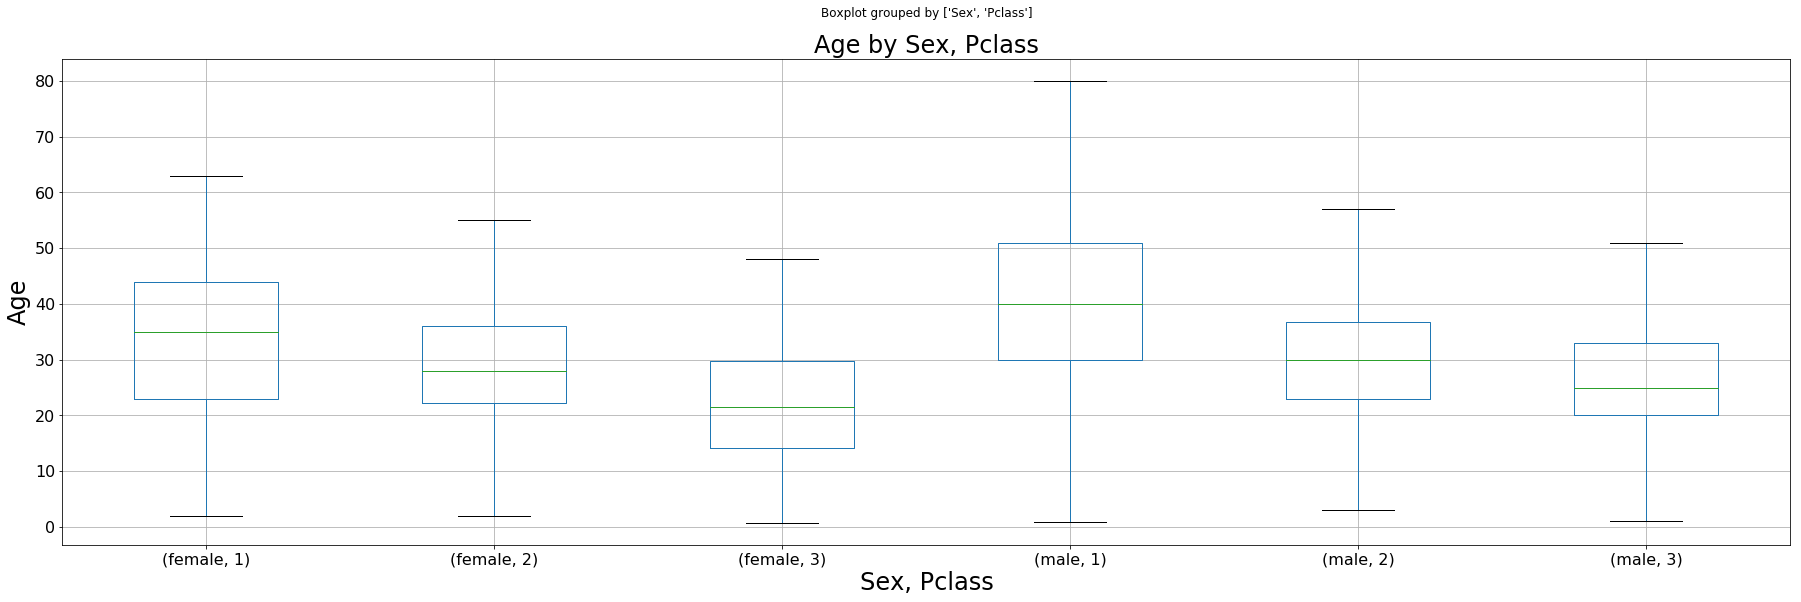

In [14]:
df_have_age.boxplot(column='Age', by=['Sex', 'Pclass'], showfliers=False)
plt.title('Age by Sex, Pclass', fontsize=24)
plt.xlabel('Sex, Pclass', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.show()

After exploring many more similar relations, I decided to infer the missing *Age* datapoints with clues from columns *Embarked* and *Pclass*. This particular relationship, when plotted, showed the most distinctly different distributions of passengers' *Age* values, with their median values ranging from 20 to 43.5, spread across 9 distinct distributions.

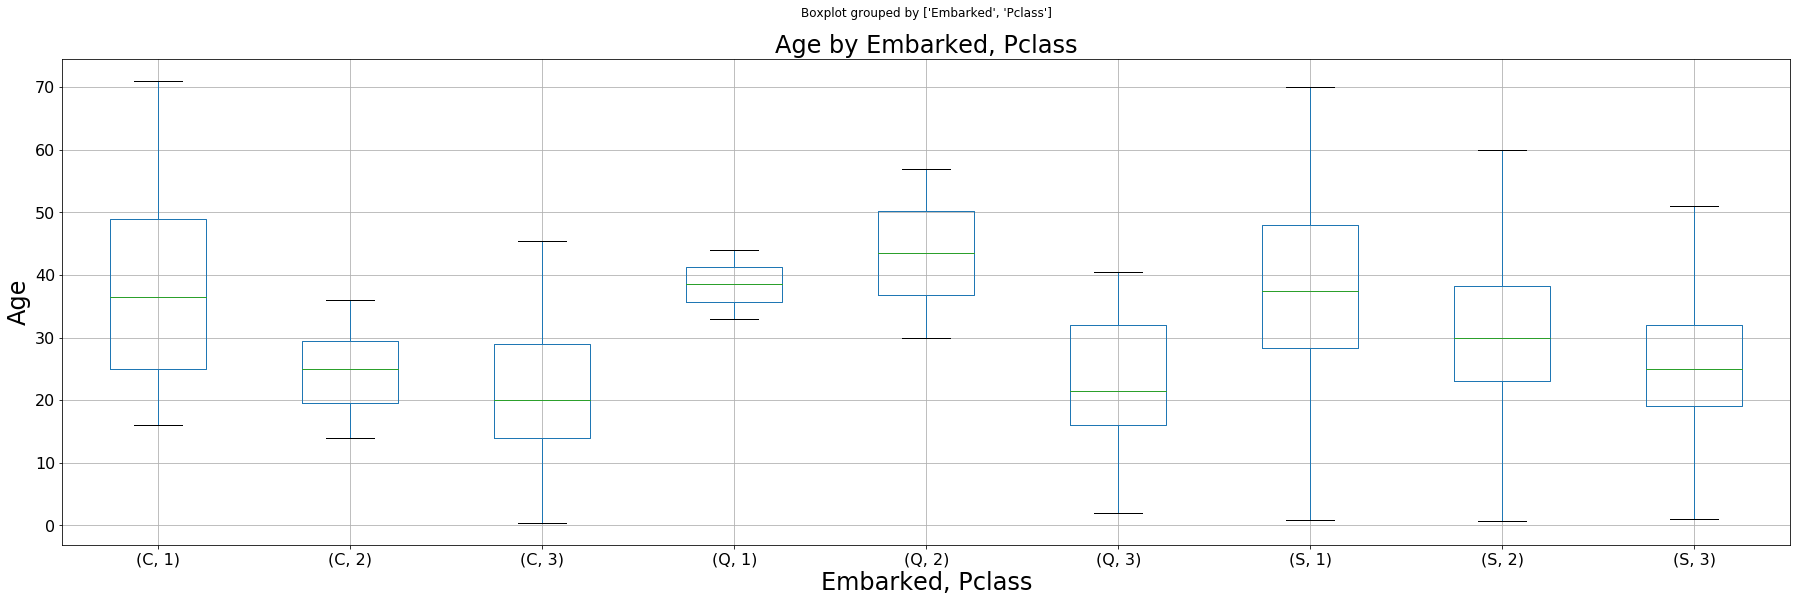

In [15]:
df_have_age.boxplot(column='Age', by=['Embarked', 'Pclass'], 
                    showfliers=False)
plt.title('Age by Embarked, Pclass', fontsize=24)
plt.xlabel('Embarked, Pclass', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.show()

Next, I created a pivot table with median values of these distributions. I chose not to use their mean values, because distribution means are known to be very susceptible to outliers. Median is the most appropriate measure of center to be used here.  

In [16]:
table = df_have_age.pivot_table(values='Age', index=['Pclass'], 
                                columns=['Embarked'], aggfunc=np.median)
table

Embarked,C,Q,S
Pclass,,,
1,36.5,38.5,37.5
2,25.0,43.5,30.0
3,20.0,21.5,25.0


In [17]:
# define function to return values of this pivot table

def impute_age_values(age):
    return table[age['Embarked']][age['Pclass']]

Before imputing values into the primary dataframe, I test the procedure on the *df_have_nan_age* dataframe.

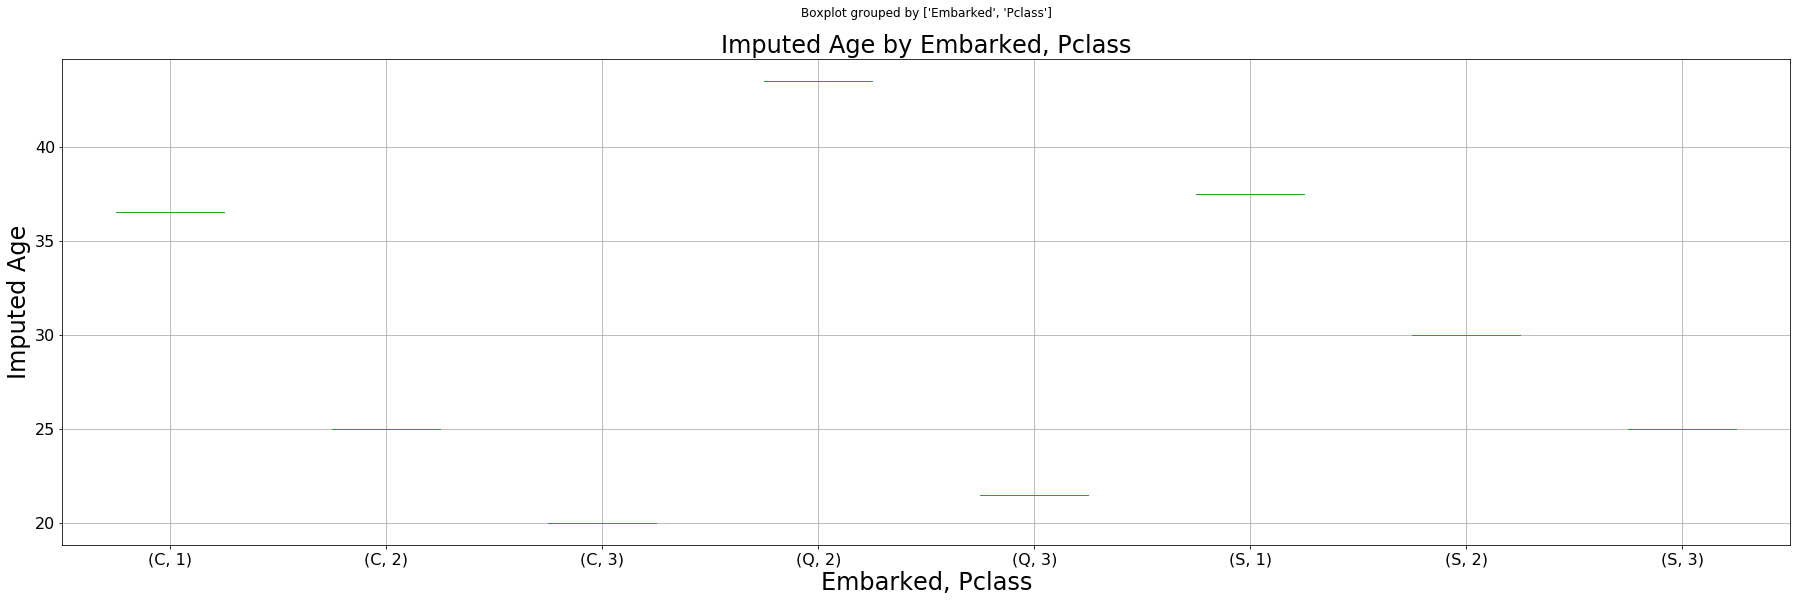

In [18]:
df_have_nan_age['Age'].fillna(df_have_nan_age[df_have_nan_age['Age']
                      .isnull()].apply(impute_age_values, axis=1),
                      inplace=True)
df_have_nan_age.boxplot(column='Age', by=['Embarked', 'Pclass'])
df_have_nan_age.describe()
plt.title('Imputed Age by Embarked, Pclass', fontsize=24)
plt.xlabel('Embarked, Pclass', fontsize=24)
plt.ylabel('Imputed Age', fontsize=24)
plt.show()

In [19]:
# impute values
df['Age'].fillna(df[df['Age'].isnull()].apply(impute_age_values, axis=1), 
                 inplace=True)
#df.head(10)

The original dataframe is not supposed to have any *NaN*s left:

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

During the investigation I realized that *Fare* column included a few extreme outliers. It is worth investigating why some passengers would apparently be traveling for free (fare 0.0), and why others would pay more than 512, which is about 127 times more than the single cheapest non-free fare ticket found.

0.0
512.3292
15
3
4.0125
127.68328972


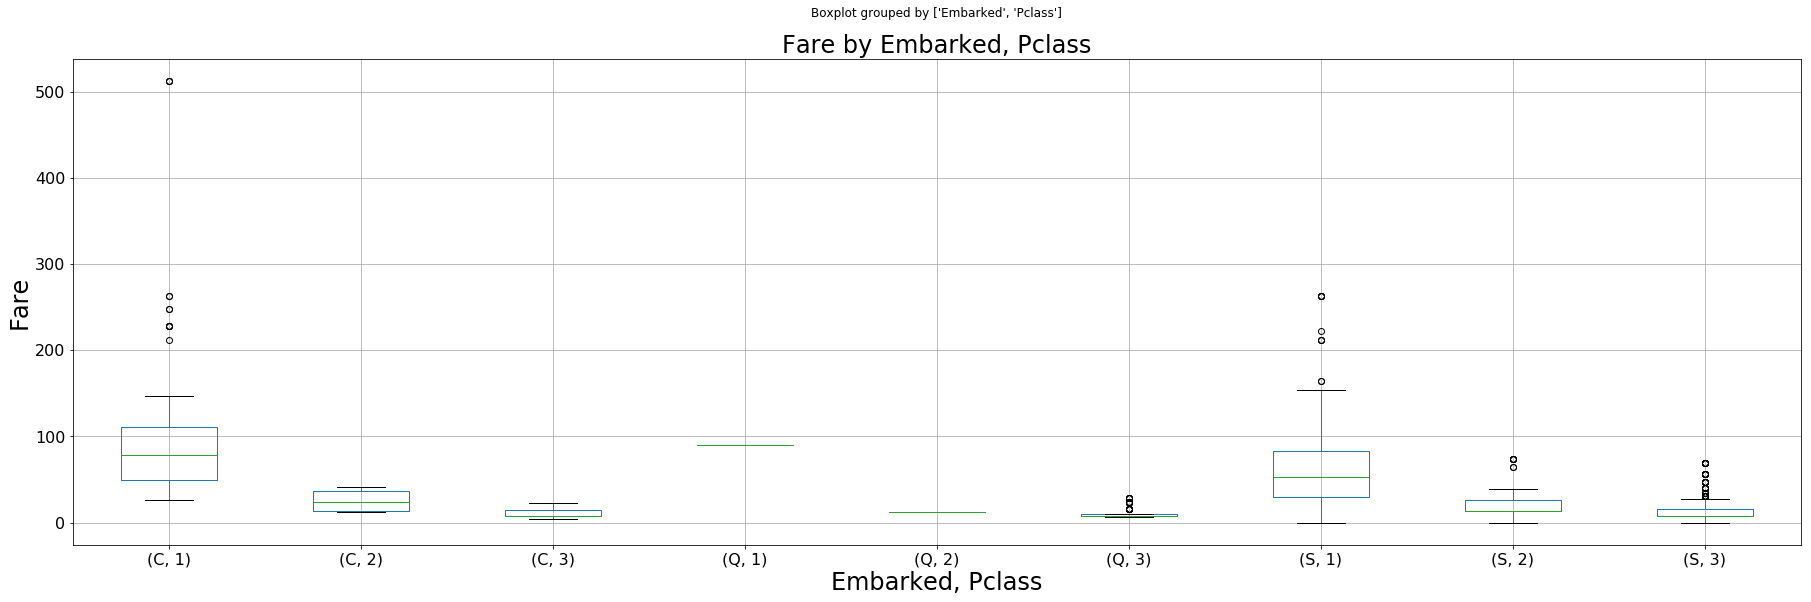

In [21]:
print(df.Fare.min())  #  -->  0.0
print(df.Fare.max())  #  -->  512.3292
print(len(df.loc[df.Fare == df.Fare.min()]))  #  -->  15
print(len(df.loc[df.Fare == df.Fare.max()]))  #  -->  3
second_cheapest_fare = (df['Fare'].sort_values(ascending=True) \
                        .iloc[len(df.loc[df.Fare == df.Fare.min()])]) 
print(second_cheapest_fare)  #  -->  4.0125
print(df.Fare.max() / second_cheapest_fare)  #  -->  127.68328972
df.boxplot(column='Fare', by=['Embarked', 'Pclass'], showfliers=True)
plt.title('Fare by Embarked, Pclass', fontsize=24)
plt.xlabel('Embarked, Pclass', fontsize=24)
plt.ylabel('Fare', fontsize=24)
plt.show()

Presented data does not exist in a vacuum; it has been collected from a real-life event. Before simply discarding or otherwise manipulating any seemingly undesirable outliers on grounds of their improbability, I researched on what was known about Titanic fare prices. It turns out that White Star Line fares varied depending on class and season. Third Class fares from London, Southampton, or Queenstown cost £7 5s (equivalent to £600 today) while the cheapest First Class fares cost £23 (£2,100 today).[1] The most expensive First Class suites were to have cost up to £870 in high season (£78,000 today).[2] It is clear that even the highest fare outliers from our dataset should not be discarded.

In [22]:
df[df.Fare == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,0.0,S
467,0,2,"Campbell, Mr. William",male,30.0,0,0,0.0,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S


The passengers travelling for free were all men, with no family members travelling with them, and they all embarked in port of departure, Southampton. My (arguable) assumption is that they are either employees or subcontractors of the White Star Line, and that data with Fare 0.0 should remain in dataset and be used for analysis, for it is most likely valid data.

## Data Exploration

Data is ready to be explored further. I can now start looking into factors that made Titanic passengers more or less likely to survive.

In [23]:
# compare with df.describe() from Basic Observations About Dataset, above
df[df.Survived == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.095526,0.473684,0.464912,48.395408
std,0.0,0.863321,14.062448,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,20.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,27.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.500000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


An "average" Titanic passenger was a 29 years old man of a middle class, with fare of 32.2 pounds, who was traveling together with another family member. Also, he did not survive the journey.

Likewise, an "average" survived Titanic passenger was a 28 years old woman of a middle class, with fare of 48.4 pounds, who was traveling together with another family member.

In [24]:
# add some more categories for more ways of exploration:

def embarked_index(embarked_value):
    if embarked_value == 'S': return 1
    elif embarked_value == 'C': return 2
    return 3

# associate points of embarkation with with their numeric representations
df['EmbIndex'] = df.Embarked.apply(embarked_index)

# create new column WithFamily to contain sum of SibSp and Parch
df['WithFamily'] = df['SibSp'].add(df['Parch'], fill_value=0)

# discretize WithFamily values into two groups based on SibSp and Parch
df['FamilyIndex'] = df.WithFamily.apply(lambda x: 1 if x > 0 else 0)

# discretize Fare values into equal-sized buckets based on quartiles
df['FareIndex'] = (pd.qcut(df.Fare, [0, .25, .5, .75, 1],
                           labels=[1, 2, 3, 4]))
#print(df.tail(15))

Next, I want to know age structures of both survived passengers and of those who died. For this purpose, I created a plot (superimposed for comparison).

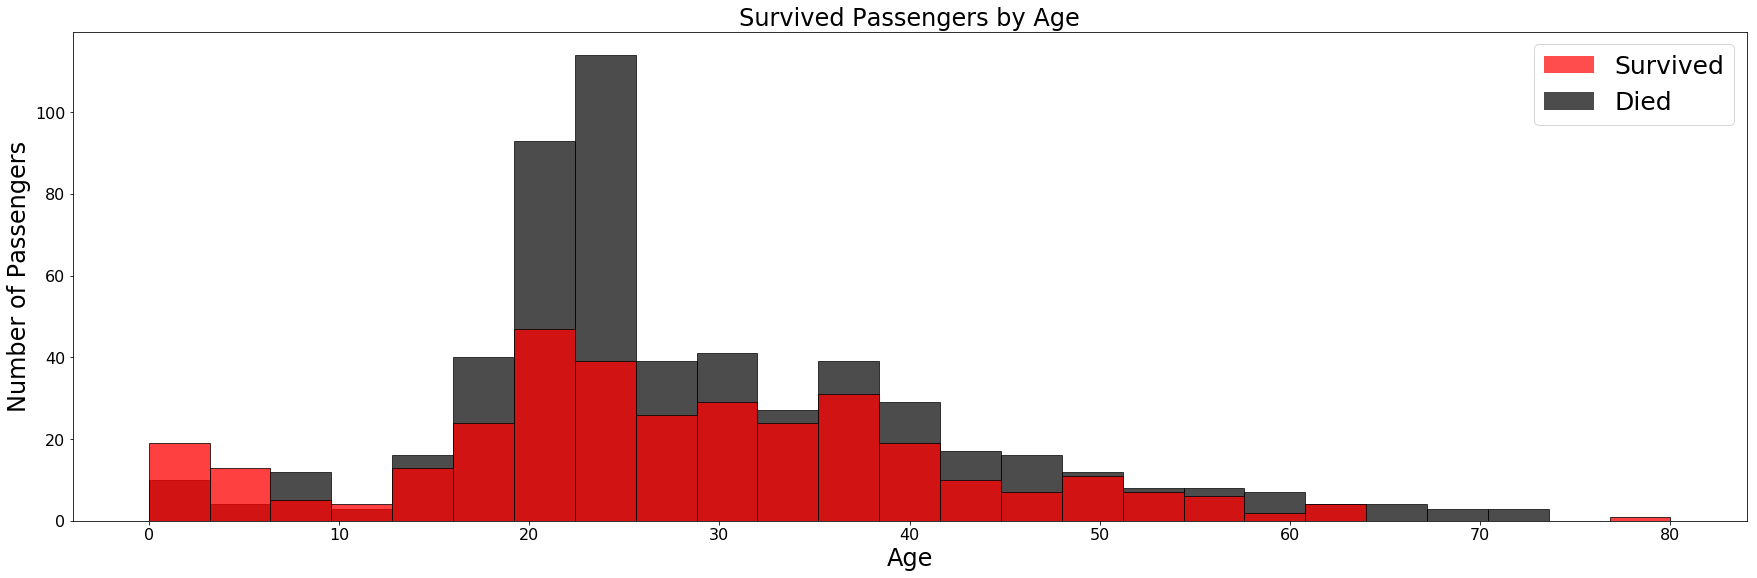

In [25]:
from matplotlib.patches import Rectangle # a fix to render the legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

p1 = ax.hist(df['Age'][df.Survived == 1] - 0.5, bins=25, range=[0, 80], 
        color='r', alpha=.75, label='Survived', edgecolor='k', 
        animated=True, zorder=2)
p2 = ax.hist(df['Age'][df.Survived == 0] - 0.5, bins=25, range=[0, 80], 
        color='k', alpha=.7, label='Survived', edgecolor='k', 
        animated=True, zorder=1)

#  a fix to render the legend
pR1 = plt.Rectangle((0, 0), 1, 1, fc="r", alpha = 0.7) 
pR2 = plt.Rectangle((1, 1), 2, 2, fc="k", alpha = 0.7)
plt.legend([pR1, pR2], ['Survived', 'Died'], loc=1, prop={'size': 25}) 

plt.title('Survived Passengers by Age', fontsize=24)
plt.xlabel('Age', fontsize=24)
plt.ylabel('Number of Passengers', fontsize=24)
plt.show()

What can be clearly seen here is that the youngest of passengers predominantly survived. Generally, the reverse was true. Survival rate of children (less than 18 years old) was 54 %, whereas survival rate of adults (18 or more) was only 36.1 %:

In [26]:
# survival rates of children and adults
len(df[df.Age < 18][df.Survived == 1]) / len(df[df.Age < 18]) * 100.0
len(df[df.Age >= 18][df.Survived == 1]) / len(df[df.Age >= 18]) * 100.0

36.11825192802057

In [27]:
# plot data

# sex, pclass, survived - percentages
m_pc1_s1 = len(df[df.Sex == 'male'][df.Pclass == 1][df.Survived == 1]) / \
           len(df[df.Sex == 'male'][df.Pclass == 1]) * 100.0
m_pc1_s0 = len(df[df.Sex == 'male'][df.Pclass == 1][df.Survived == 0]) / \
           len(df[df.Sex == 'male'][df.Pclass == 1]) * 100.0
m_pc2_s1 = len(df[df.Sex == 'male'][df.Pclass == 2][df.Survived == 1]) / \
           len(df[df.Sex == 'male'][df.Pclass == 2]) * 100.0
m_pc2_s0 = len(df[df.Sex == 'male'][df.Pclass == 2][df.Survived == 0]) / \
           len(df[df.Sex == 'male'][df.Pclass == 2]) * 100.0
m_pc3_s1 = len(df[df.Sex == 'male'][df.Pclass == 3][df.Survived == 1]) / \
           len(df[df.Sex == 'male'][df.Pclass == 3]) * 100.0
m_pc3_s0 = len(df[df.Sex == 'male'][df.Pclass == 3][df.Survived == 0]) / \
           len(df[df.Sex == 'male'][df.Pclass == 3]) * 100.0

f_pc1_s1 = len(df[df.Sex == 'female'][df.Pclass == 1][df.Survived == 1]) / \
           len(df[df.Sex == 'female'][df.Pclass == 1]) * 100.0
f_pc1_s0 = len(df[df.Sex == 'female'][df.Pclass == 1][df.Survived == 0]) / \
           len(df[df.Sex == 'female'][df.Pclass == 1]) * 100.0
f_pc2_s1 = len(df[df.Sex == 'female'][df.Pclass == 2][df.Survived == 1]) / \
           len(df[df.Sex == 'female'][df.Pclass == 2]) * 100.0
f_pc2_s0 = len(df[df.Sex == 'female'][df.Pclass == 2][df.Survived == 0]) / \
           len(df[df.Sex == 'female'][df.Pclass == 2]) * 100.0
f_pc3_s1 = len(df[df.Sex == 'female'][df.Pclass == 3][df.Survived == 1]) / \
           len(df[df.Sex == 'female'][df.Pclass == 3]) * 100.0
f_pc3_s0 = len(df[df.Sex == 'female'][df.Pclass == 3][df.Survived == 0]) / \
           len(df[df.Sex == 'female'][df.Pclass == 3]) * 100.0

# general survival by sex
m_s1 = len(df[df.Sex == 'male'][df.Survived == 1]) / \
       len(df[df.Sex == 'male']) * 100.0
m_s0 = len(df[df.Sex == 'male'][df.Survived == 0]) / \
       len(df[df.Sex == 'male']) * 100.0
f_s1 = len(df[df.Sex == 'female'][df.Survived == 1]) / \
       len(df[df.Sex == 'female']) * 100.0
f_s0 = len(df[df.Sex == 'female'][df.Survived == 0]) / \
       len(df[df.Sex == 'female']) * 100.0

survived_data_all = [m_s1, f_s1, m_s0, f_s0]
    
survived_data_by_class_male = [m_pc1_s1, m_pc2_s1, m_pc3_s1, \
                               m_pc1_s0, m_pc2_s0, m_pc3_s0]
                                        
survived_data_by_class_female = [f_pc1_s1, f_pc2_s1, f_pc3_s1, \
                                 f_pc1_s0, f_pc2_s0, f_pc3_s0]

There is a stark difference between survival rate of men versus that of women:

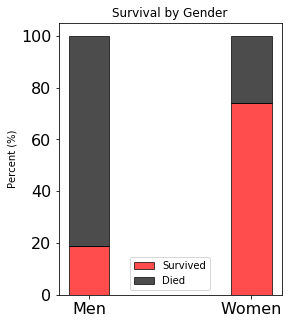

In [28]:
N = 2
data = survived_data_all

fig = plt.figure(figsize=(4, 5))
index = np.arange(N)    
width = 0.25       

p1 = plt.bar(index, data[:2], width, color='r', alpha=.7, edgecolor='k')
p2 = plt.bar(index, data[2:], width, bottom=data[:2], color='k', alpha=.7,
             edgecolor='k')

plt.ylabel('Percent (%)')
plt.title('Survival by Gender')
plt.xticks(index, ('Men', 'Women'))
plt.legend((p1[0], p2[0]), ('Survived', 'Died'))
plt.show()

What follows is my personal favorite - a depiction of a possible influence of both gender and of apparent passenger class on survival. The most likely passengers to survive were women of Pclass 1. The least likely to survive were men of Pclass 3:

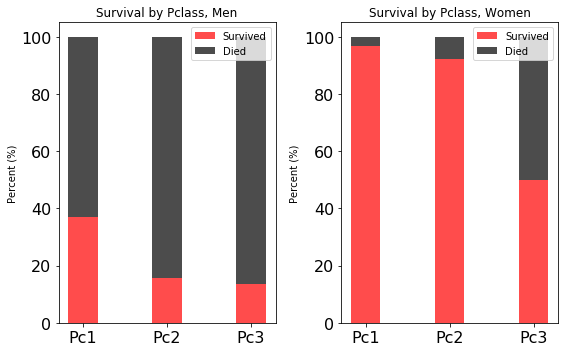

In [29]:
data_m = survived_data_by_class_male
data_f = survived_data_by_class_female

N = 3
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust()
index = np.arange(N)  
width = 0.35
edgecolor='k'

ax1 = fig.add_subplot(1, 2, 1)
p1 = ax1.bar(index, data_m[:3], width, color='r', alpha=.7)
p2 = ax1.bar(index, data_m[3:], width, bottom=data_m[:3], color='k',
             alpha=.7)
ax1.set_title('Survival by Pclass, Men')
ax1.set_ylabel('Percent (%)')
ax1.set_xticklabels(((index),'Pc1', 'Pc2', 'Pc3'))
ax1.legend([p1[0], p2[0]], ['Survived', 'Died'])

ax2 = fig.add_subplot(1, 2, 2)
p3 = ax2.bar(index, data_f[:3], width, color='r', alpha=.7)
p4 = ax2.bar(index, data_f[3:], width, bottom=data_f[:3], color='k',
             alpha=.7)
ax2.set_title('Survival by Pclass, Women')
ax2.set_ylabel('Percent (%)')
ax2.set_xticklabels(((index),'Pc1', 'Pc2', 'Pc3'))
ax2.legend([p3[0], p4[0]], ['Survived', 'Died'])
                    
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0, wspace=1.0,
                    hspace=1.0)
                    
plt.tight_layout()
plt.show()

Passengers traveling with at least one family member were more likely to survive. Here, term *family member* is defined as either of the following: brother, sister, stepbrother, stepsister, husband, wife, mother, father, daughter, son, stepdaughter or stepson. 

Mistresses, fiancés and nannies are not considered passengers' family members. 

In [30]:
# survival rate of passengers who traveled with family
fi1_s1 = len(df[df.FamilyIndex == 1][df.Survived == 1]) / \
           len(df[df.FamilyIndex == 1]) * 100.0

# survival rate of passengers who traveled alone
fi0_s1 = len(df[df.FamilyIndex == 0][df.Survived == 1]) / \
           len(df[df.FamilyIndex == 0]) * 100.0

print(fi1_s1)
print(fi0_s1)

50.56497175141242
30.353817504655495


Out of 354 passengers who traveled with some other person that can be considered their family member, 179 (or 50.6 %) survived. Out of 537 passengers that traveled alone, only 163 (or 30.4 %) survived. The difference in both survival rates is noticeable, although not much more can be said about a possible causality between presence of family members and survival without further statistical analysis. 

That being said, family tragedies did occur, and following is an example of an entire family gone (with three family members not being a part of this population; also note that their ages have been imputed - previously unknown - which is a strong indicator that none of the ten family members actually survived). 

In [31]:
df[df.Survived == 0][df.WithFamily == df.WithFamily.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,EmbIndex,WithFamily,FamilyIndex,FareIndex
PassengerId,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,25.0,8,2,69.55,S,1,10,1,4
181,0,3,"Sage, Miss. Constance Gladys",female,25.0,8,2,69.55,S,1,10,1,4
202,0,3,"Sage, Mr. Frederick",male,25.0,8,2,69.55,S,1,10,1,4
325,0,3,"Sage, Mr. George John Jr",male,25.0,8,2,69.55,S,1,10,1,4
793,0,3,"Sage, Miss. Stella Anna",female,25.0,8,2,69.55,S,1,10,1,4
847,0,3,"Sage, Mr. Douglas Bullen",male,25.0,8,2,69.55,S,1,10,1,4
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,69.55,S,1,10,1,4


There might also be a connection between passengers' fare (i.e., money paid for the journey) and survival. 

In [32]:
# bucket sizes
print(len(df[df.FareIndex == 1]))
print(len(df[df.FareIndex == 2]))
print(len(df[df.FareIndex == 3]))
print(len(df[df.FareIndex == 4]))

len(df[df.FareIndex == 1][df.Survived == 1]) / len(df[df.FareIndex == 1])
len(df[df.FareIndex == 2][df.Survived == 1]) / len(df[df.FareIndex == 2])
len(df[df.FareIndex == 3][df.Survived == 1]) / len(df[df.FareIndex == 3])
len(df[df.FareIndex == 4][df.Survived == 1]) / len(df[df.FareIndex == 4])

223
224
222
222


0.581081081081081

Earlier, I grouped *Fare* values into four quartile-based buckets with intent to explore survival rates of passengers, based on their Fares. The four buckets in FareIndex represent rough proxies for low (1), medium (2), high (3) and very high (4) fares. I want to learn about the relationship between different fares and survival rates associated with them.

Fare | Bucket Size | Survived | Percent Survived (%)
:---: | :---: | :---: | :---:
**Low** | 223 | 44 | **19.7**
**Medium** | 224 | 68 | **30.4**
**High** | 222 | 101 | **45.5**
**Very High** | 222 | 129 | **58.1**
Total | 891 | 342 | NA 

The table seems to show a positive relationship between fare and survival rates - the higher the fare, the higher the survival rate - although I cannot claim a causal relationship between the two based solely on this data (i. e., without a statistical test).

Similarly, it is possible to uncover relationships between each embarkation port and its corresponding survival rate.

In [33]:
print(len(df[df.Embarked == 'S'][df.Survived == 1]))
print(len(df[df.Embarked == 'C'][df.Survived == 1]))
print(len(df[df.Embarked == 'Q'][df.Survived == 1]))

len(df[df.Embarked == 'S'][df.Survived == 1]) / len(df[df.Embarked == 'S'])
len(df[df.Embarked == 'C'][df.Survived == 1]) / len(df[df.Embarked == 'C'])
len(df[df.Embarked == 'Q'][df.Survived == 1]) / len(df[df.Embarked == 'Q'])

219
93
30


0.38961038961038963

Port of Embarkation | Embarked | Survived | Percent Survived (%)
:---: | :---: | :---: | :---:
**Southampton** | 646 | 219 | **33.9**
**Cherbourg** | 168 | 93 | **55.4**
**Queenstown** | 77 | 30 | **39.0**
Total | 891 | 342 | NA 

There were noticeable differences between survival rates of passengers who embarked in each of the three ports. Survival rate of those who traveled from Southampton was lowest, at 33.9 percent, while the highest one was that of Cherbourg, at 55.4 %.

### Another Look at Fare

By now, bulk of exploration regarding passengers' survival (the core of this presentation) has been done. Out of curiosity, and unconnected to the main question, I decided to look some more into how *Pclass*, *Age*, *Fare* and *Embarked* are connected.

The three plots below are visual representations of how *Fare* connects to *Pclass*, *Age*, and *Embarked*. The first plot clearly shows that buying of expensive tickets was predominantly done by passengers who were perceived to be of upper socio-economic class. 
The second plot shows something that I found surprising - there does not seem to be much difference in prices of tickets bought by passengers of middle and lower socio-economic classes.
The third plot is interesting because it shows a stark contrast between typical tickets bought in Queenstown, and those bought in the other two ports of embarkation. The tickets bought in Queenstown were generally cheaper, possibly indicating a lesser economic power of passengers who embarked there. 

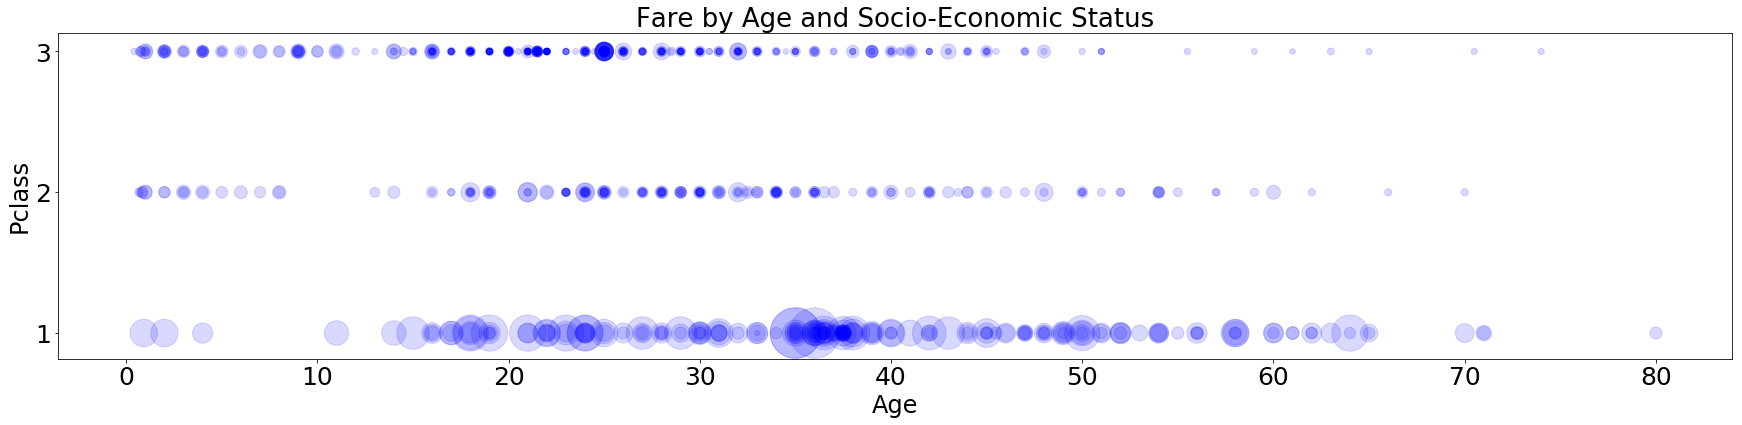

In [34]:
# Fare, by Age and Pclass
df.plot.scatter(x='Age', y='Pclass', s=df['Fare']*5, c='b', alpha=.15,
                yticks=[1, 2, 3], figsize=(30, 6), fontsize=25, grid=False
               )
plt.title('Fare by Age and Socio-Economic Status', fontsize=26)
plt.xlabel('Age', fontsize=24)
plt.ylabel('Pclass', fontsize=24)
plt.show()

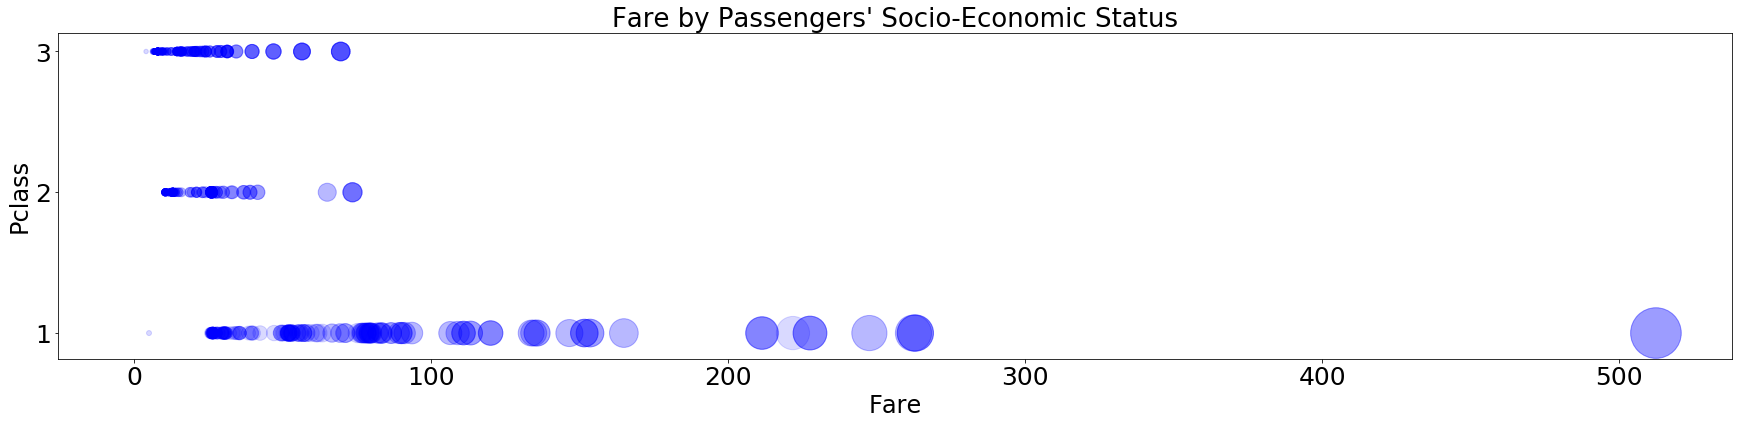

In [35]:
# Pclass and Fare (Fare double encoded)
df.plot.scatter(x='Fare', y='Pclass', s=df['Fare']*5, c='b', alpha=.15,
                yticks=[1, 2, 3], figsize=(30, 6), fontsize=25, grid=False
               )
plt.title('Fare by Passengers\' Socio-Economic Status', fontsize=26)
plt.xlabel('Fare', fontsize=24)
plt.ylabel('Pclass', fontsize=24)
plt.show()

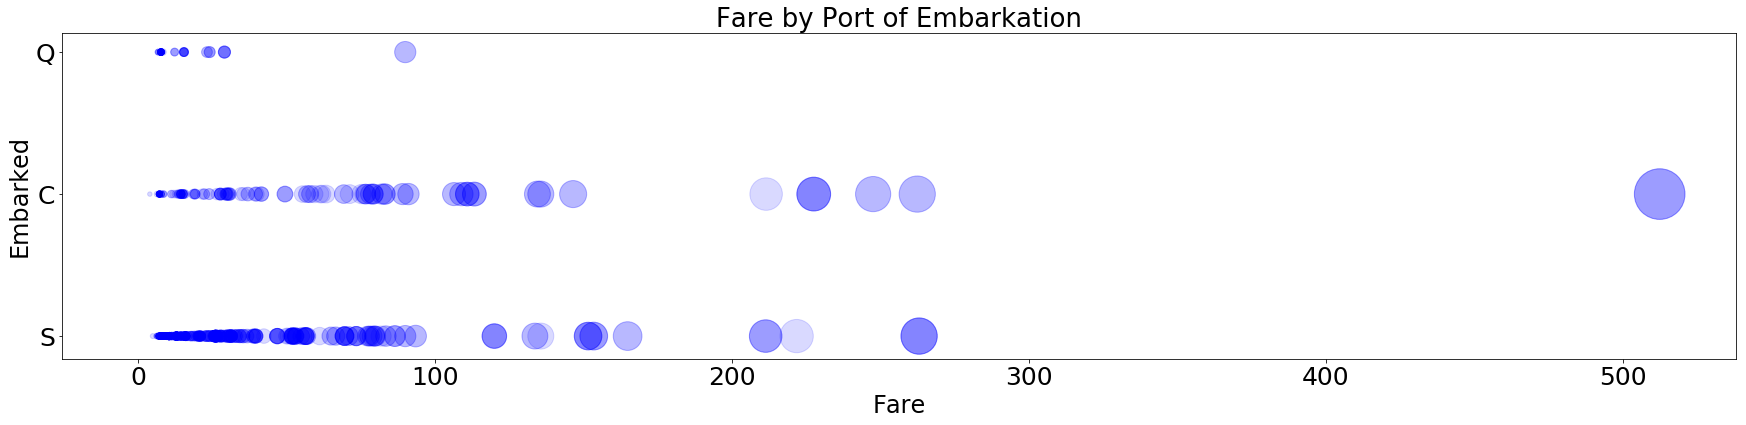

In [36]:
# Embarked and Fare (Fare double encoded)

y_nonnum_ticks=['S','C','Q']
yticks=[1, 2, 3]

df.plot.scatter(x='Fare', y='EmbIndex', s=df['Fare']*5, c='b', alpha=.15,
                yticks=yticks, figsize=(30, 6), fontsize=25, grid=False
               )
plt.yticks(yticks, y_nonnum_ticks)
plt.title('Fare by Port of Embarkation', fontsize=26)
plt.xlabel('Fare', fontsize=24)
plt.ylabel('Embarked', fontsize=24)
plt.show()

## Conclusion

The uncovered patterns in Data Exploration, above, suggest that passengers' circumstaces - age, gender, socio-economic status, presence of other family members, fare and port of embarkation - influenced their chances of survival, although it would be improper to claim that there is a causal relationship between them based only on this, basic exploration.

Based purely on the uncovered survival rates, it is possible to suggest a "model" Titanic passenger with best chances of survival. 
Such passenger would be a child (a woman) of the upper socio-economic class who would be travelling with one or more family members, whose fare would be in the upper quartal (i.e., very high), and whose port of embarkation would be Cherbourg.
A "model" Titanic passenger with worst chances of survival, on the other hand, would be an adult man of the lower socio-economic class who would be travelling alone, whose fare would be in the lower quartal (i.e., low), and whose port of embarkation would be Southampton.

## Sources

https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

https://www.kaggle.com/c/titanic/data

http://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

https://stackoverflow.com/questions/23617129/matplotlib-how-to-make-two-histograms-have-the-same-bin-width

https://github.com/matplotlib/matplotlib/issues/1943

https://matplotlib.org/faq/howto_faq.html

https://matplotlib.org/api/pyplot_api.html

https://matplotlib.org/faq/howto_faq.html

https://matplotlib.org/api/pyplot_api.html

https://matplotlib.org/examples/pylab_examples/bar_stacked.html

https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

https://stackoverflow.com/questions/6974847/plot-with-non-numerical-data-on-x-axis-for-ex-dates

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

https://www.analyticsvidhya.com/

Grus J. (2015), Data Science from Scratch (1st ed.). Sebastopol: O’Reilly Media. 

McKinney W. (2013), Python for Data Analysis (1st ed.). Sebastopol: O’Reilly Media.


referenced in Wikipedia, https://en.wikipedia.org/wiki/RMS_Titanic:

[1] Southampton–Cherbourg–New York Service, White Star Line leaflet of circa January 1912.

[2] Howells, Richard (1999). The Myth of the Titanic. United Kingdom: MacMillan Press.